# Processing FIA DB Files for FNCAP

## Introduction

This document processes FIA data (Sections 0-6), then estimates a nonlinear growth model (Sections 7-?).

## 0. Check whether the IDE/.ipynb is working. Get packages.

In [1]:
# Is the IDE working?

1 + 1

# Instead of learning new things, I'll stick to the Tidyverse. Cheers to the developers.

using Tidier

# Set display rows.

ENV["DATAFRAMES_COLUMNS"] = 10
ENV["DATAFRAMES_ROWS"] = 10

10

## 1. Get data.

In [2]:
dat_or_plot = read_csv("data/OR_PLOT.csv")
dat_or_cond = read_csv("data/OR_COND.csv")
dat_or_tree = read_csv("data/OR_TREE.csv")

Row,CN,PLT_CN,PREV_TRE_CN,INVYR,STATECD,UNITCD,COUNTYCD,PLOT,SUBP,TREE,⋯
,Int64,Int64,Int64?,Int64,Int64,Int64,Int64,Int64,Int64,Int64,⋯
1,1,64,missing,1999,41,0,5,1,1,1,⋯
2,2,64,missing,1999,41,0,5,1,1,2,⋯
3,3,64,missing,1999,41,0,5,1,1,3,⋯
4,5,64,missing,1999,41,0,5,1,1,5,⋯
5,6,64,missing,1999,41,0,5,1,1,6,⋯
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱
749789,1127606689290487,786780305290487,missing,2021,41,4,63,99829,4,146,⋯
749790,1127606690290487,786780305290487,missing,2021,41,4,63,99829,4,147,⋯
749791,1127606691290487,786780305290487,missing,2021,41,4,63,99829,4,148,⋯


## 2. Filter plots to those (a) in western Oregon (b) with at least one pair of observations.

In [3]:
dat_or_plot_less = @chain dat_or_plot begin
    @filter(LON < -120)
    @mutate(MATCH_CN = if_else(ismissing(PREV_PLT_CN), CN, PREV_PLT_CN))
    @group_by(MATCH_CN)
    @filter(n() > 1)
    @ungroup
    @select(STATECD, UNITCD, COUNTYCD, PLOT, MATCH_CN, INVYR, MEASYEAR, LON, LAT)
    @mutate(join = 1)
end

Row,STATECD,UNITCD,COUNTYCD,PLOT,MATCH_CN,INVYR,MEASYEAR,LON,LAT,join
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Int64
1,41,3,31,86413,23884220010900,2001,1999,-120.939,44.5214,1
2,41,0,7,65429,23905912010900,2001,2001,-123.455,45.8468,1
3,41,3,21,59734,23930445010900,2001,2001,-120.262,45.112,1
4,41,0,57,64502,23850638010900,2001,2001,-123.944,45.6829,1
5,41,3,55,58461,23848826010900,2001,2001,-120.904,45.3065,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
17120,41,0,5,96682,193209178020004,2017,2017,-122.159,45.0668,1
17121,41,2,19,91895,193208964020004,2017,2017,-123.815,43.8799,1
17122,41,1,39,80933,193208965020004,2017,2017,-122.044,44.1549,1


## 3. Filter conditions to private Douglas fir.

In [4]:
dat_or_cond_less = @chain dat_or_cond begin
    @filter(FORTYPCD in 201:203,  OWNGRPCD == 40)
    #  Select columns to keep for joins. 
    @select(STATECD, UNITCD, COUNTYCD, PLOT, CONDID, CONDPROP_UNADJ, INVYR, STDAGE, FLDAGE, SITECLCD, DSTRBCD1, DSTRBYR1, TRTCD1, TRTYR1)
    #  Select fewer columns (for now).
    @select(STATECD, UNITCD, COUNTYCD, PLOT, CONDID, CONDPROP_UNADJ, INVYR, STDAGE, FLDAGE, SITECLCD)
end

Row,STATECD,UNITCD,COUNTYCD,PLOT,CONDID,CONDPROP_UNADJ,INVYR,STDAGE,FLDAGE,SITECLCD
,Int64,Int64,Int64,Int64,Int64,Float64,Int64,Int64?,Int64?,Int64?
1,41,4,63,97331,1,0.801911,2001,85,85,5
2,41,4,63,53628,1,1.0,2001,85,85,5
3,41,2,15,53474,1,0.615244,2001,5,5,2
4,41,1,41,61638,1,1.0,2001,15,15,3
5,41,4,63,59287,1,1.0,2001,75,75,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2876,41,3,65,67968,1,1.0,2019,100,100,4
2877,41,0,7,68379,1,1.0,2019,27,27,2
2878,41,1,39,71081,3,0.086876,2019,30,30,3


## 4. Join subsets of plots and conditions.

In [5]:
dat_or_keep = @chain dat_or_cond_less begin
    @left_join(dat_or_plot_less)
    @filter(join == 1)
end

Row,STATECD,UNITCD,COUNTYCD,PLOT,CONDID,CONDPROP_UNADJ,INVYR,STDAGE,FLDAGE,SITECLCD,⋯
,Int64,Int64,Int64,Int64,Int64,Float64,Int64,Int64?,Int64?,Int64?,⋯
1,41,0,7,65429,1,0.868175,2001,8,8,4,⋯
2,41,0,7,65429,2,0.131825,2001,45,45,4,⋯
3,41,2,15,53474,1,0.615244,2001,5,5,2,⋯
4,41,1,41,61638,1,1.0,2001,15,15,3,⋯
5,41,1,39,74705,1,1.0,2001,30,30,2,⋯
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱
1603,41,2,15,79813,1,0.805744,2019,46,46,4,⋯
1604,41,0,67,52996,1,1.0,2019,14,14,2,⋯
1605,41,0,71,93977,2,0.914735,2019,9,9,3,⋯


## 5. Use the result of (4) to filter trees, then filter trees to Douglas fir.

In [6]:
dat_or_tree_less = @chain dat_or_tree begin
    # Select columns that we might use.
    @select(CN, STATECD, UNITCD, COUNTYCD, PLOT, CONDID, INVYR, SPGRPCD, VOLCFNET, VOLBFNET, TPA_UNADJ)
    # Get plot and condition information.
    @left_join(dat_or_keep)
    # Filter on plot and condition.
    @filter(join == 1)
    @select(-join)
    # Filter on species group (down to Douglas firs). This is equivalent to SPCD == 202.
    @filter(SPGRPCD == 10)
end

Row,CN,STATECD,UNITCD,COUNTYCD,PLOT,CONDID,INVYR,SPGRPCD,VOLCFNET,VOLBFNET,⋯
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64?,Float64?,⋯
1,23906794010900,41,0,7,56407,1,2001,10,4.60945,missing,⋯
2,23906798010900,41,0,7,56407,1,2001,10,3.0187,missing,⋯
3,23906769010900,41,0,7,56407,1,2001,10,62.3187,missing,⋯
4,23906777010900,41,0,7,56407,1,2001,10,2.4243,missing,⋯
5,23906800010900,41,0,7,56407,1,2001,10,8.33663,28.8682,⋯
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱
31911,1285676658290487,41,2,11,53140,1,2021,10,41.4217,224.83,⋯
31912,1285676662290487,41,2,11,53140,1,2021,10,34.8015,187.883,⋯
31913,1285676664290487,41,2,11,53140,1,2021,10,10.8199,missing,⋯


## 6. Aggregate to volume-per-acre, then pivot.

In [7]:
dat_or_tree_wide = @chain dat_or_tree_less begin
    @filter(!ismissing(VOLCFNET) & !ismissing(TPA_UNADJ))
    @group_by(STATECD, UNITCD, COUNTYCD, PLOT, CONDID, MATCH_CN, LON, LAT, INVYR, MEASYEAR, STDAGE, FLDAGE, SITECLCD)
    @summarize(VOLCFNET = sum(VOLCFNET * TPA_UNADJ), 
               VOLBFNET = sum(VOLBFNET * TPA_UNADJ))
    @ungroup
    @group_by(STATECD, UNITCD, COUNTYCD, PLOT, CONDID)
    @filter(n() == 2)
    @mutate(PLOT_UID = string(STATECD, "_", UNITCD, "_", COUNTYCD, "_", PLOT, "_", CONDID))
    @ungroup
    @select(PLOT_UID, MATCH_CN, LON, LAT, INVYR, MEASYEAR, STDAGE, FLDAGE, SITECLCD, VOLCFNET, VOLBFNET)
    @arrange(PLOT_UID, MATCH_CN, INVYR)
    @group_by(PLOT_UID)
    @mutate(WHICH = if_else(INVYR == maximum(INVYR), "Second", "First"),
            SITECLCD = if_else(INVYR == maximum(INVYR), 0, SITECLCD)) # ""
    @mutate(SITECLCD = maximum(SITECLCD)) # This is a harebrained Band-Aid to get a time-invariant site productivity class.
    @ungroup
    # This is a Band-Aid for easier pivoting. Time-varying variables could be worth keeping as-is.
    @select(PLOT_UID, MATCH_CN, LON, LAT, INVYR, SITECLCD, VOLCFNET, WHICH)
end

Row,PLOT_UID,MATCH_CN,LON,LAT,INVYR,SITECLCD,VOLCFNET,WHICH
,String,Int64?,Float64?,Float64?,Int64,Int64,Float64,String
1,41_0_27_51533_1,22954279010497,-121.493,45.5487,2007,4,463.722,First
2,41_0_27_51533_1,22954279010497,-121.493,45.5487,2017,4,1508.13,Second
3,41_0_27_72243_1,24932528010900,-121.566,45.4899,2004,4,1630.26,First
4,41_0_27_72243_1,24932528010900,-121.566,45.4899,2014,4,2733.56,Second
5,41_0_27_75074_1,12876232010497,-121.692,45.5427,2005,5,44.9619,First
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
916,41_3_65_97674_1,12795490010497,-121.465,45.0413,2015,6,1578.15,Second
917,41_3_65_98082_1,25088840010900,-121.636,44.953,2004,5,2170.76,First
918,41_3_65_98082_1,25088840010900,-121.636,44.953,2014,5,4228.93,Second


Things get silly in the following section: pivot_wider in Tidier doesn't appear to support pivoting multiple columns.

In [8]:
dat_or_tree_wide_left = @chain dat_or_tree_wide begin
    @select(-VOLCFNET)
    @pivot_wider(names_from = WHICH, values_from = INVYR)
    @rename(Year_First = First, Year_Second = Second)
end

dat_or_tree_wide_right = @chain dat_or_tree_wide begin
    @select(-INVYR)
    @pivot_wider(names_from = WHICH, values_from = VOLCFNET)
    @rename(Volume_First = First, Volume_Second = Second)
end

dat_or_tree_wider = @left_join(dat_or_tree_wide_left, dat_or_tree_wide_right)

dat_or_differences = @chain dat_or_tree_wider begin
    @select(-MATCH_CN)
    @mutate(Year_Difference = Year_Second - Year_First,
            Volume_Difference = Volume_Second - Volume_First)
end

write_csv(dat_or_differences, "output/dat_or_differences.csv")

dat_or_differences

Row,PLOT_UID,LON,LAT,SITECLCD,Year_First,Year_Second,Volume_First,Volume_Second,Year_Difference,Volume_Difference
,String,Float64?,Float64?,Int64,Int64?,Int64?,Float64?,Float64?,Int64,Float64
1,41_0_27_51533_1,-121.493,45.5487,4,2007,2017,463.722,1508.13,10,1044.41
2,41_0_27_72243_1,-121.566,45.4899,4,2004,2014,1630.26,2733.56,10,1103.3
3,41_0_27_75074_1,-121.692,45.5427,5,2005,2015,44.9619,446.564,10,401.602
4,41_0_47_52145_1,-122.483,44.8223,3,2009,2019,2110.81,4308.39,10,2197.58
5,41_0_47_59472_1,-122.615,44.9544,2,2001,2011,8512.12,213.922,10,-8298.2
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
456,41_3_65_89169_1,-121.643,45.104,3,2006,2016,2296.78,2481.73,10,184.952
457,41_3_65_97189_1,-121.57,45.0116,4,2002,2012,3206.03,1637.41,10,-1568.62
458,41_3_65_97674_1,-121.465,45.0413,6,2005,2015,1127.87,1578.15,10,450.289


## 6. Data Visualization

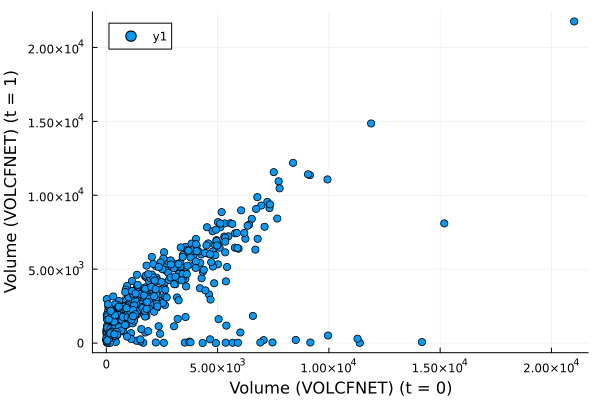

In [9]:
# Keeping this TidierPlots::ggplot mess as a reminder not to mess with TidierPlots.

# The string conversion is to handle Tidier's ggplot being picky about types.

# dat_or_differences = @mutate(dat_or_differences, SITECLCD_STRING = string(SITECLCD))

# This returns two identical plots in .ipynb, but not in a .jl or in the REPL. 

# ggplot(dat_or_differences, @aes(x = Volume_First, y = Volume_Second, color = SITECLCD_STRING)) + 
# geom_point() + 
# labs(x = "Volume (VOLCFNET) (t = 0)", y = "Volume (VOLCFNET) (t = 1)")  + 
# theme_minimal()

using Plots

plot(dat_or_differences.Volume_First, 
     dat_or_differences.Volume_Second, 
     xlabel = "Volume (VOLCFNET) (t = 0)",
     ylabel = "Volume (VOLCFNET) (t = 1)",
     seriestype=:scatter)

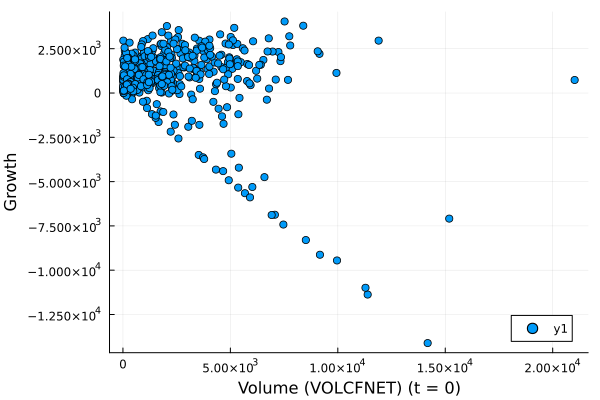

In [10]:
plot(dat_or_differences.Volume_First, 
     dat_or_differences.Volume_Difference, 
     xlabel = "Volume (VOLCFNET) (t = 0)",
     ylabel = "Growth",
     seriestype=:scatter)

# Estimating Growth from FIA DB for FNCAP

## 7. Packages (Again)

In [11]:
using FastHalton
using Distributions
using Optim

## 8. Data

In [12]:
# Filter out observations with negative growth. 
#  This keeps things simple in the absence of variables to account for negative growth.

dat_growth = @filter(dat_or_differences, Volume_Difference > 0)

# Filter out observations for all site classes except one.
#  This keeps things simple in the absence of functional programming to estimate several models together.

dat_growth_3 = @filter(dat_growth, SITECLCD == 3) 

Row,PLOT_UID,LON,LAT,SITECLCD,Year_First,Year_Second,Volume_First,Volume_Second,Year_Difference,Volume_Difference
,String,Float64?,Float64?,Int64,Int64?,Int64?,Float64?,Float64?,Int64,Float64
1,41_0_47_52145_1,-122.483,44.8223,3,2009,2019,2110.81,4308.39,10,2197.58
2,41_0_47_81093_1,-122.608,44.81,3,2005,2015,5301.1,7205.79,10,1904.68
3,41_0_47_81424_1,-122.532,44.7896,3,2003,2013,332.698,2370.09,10,2037.39
4,41_0_53_52394_1,-123.512,44.9102,3,2009,2019,2044.44,4634.5,10,2590.06
5,41_0_53_72249_1,-123.171,45.0106,3,2006,2016,3586.43,3832.21,10,245.778
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
172,41_2_29_73437_1,-122.519,42.645,3,2002,2012,2219.19,3648.28,10,1429.1
173,41_2_29_81520_1,-123.062,42.7039,3,2010,2020,3109.16,4491.77,10,1382.61
174,41_2_29_85443_1,-122.451,42.5997,3,2008,2018,183.019,658.534,10,475.516


## 9. Parameters

In [13]:
b = [100, 1, 100, 0.5] # Set initial values for parameters of interest.
t = 1 # Set an initial timestep.
T = maximum(dat_growth.Year_Difference) # Set a final timestep. This happens to be 10.
skip = 1000 # Set a skipping interval for Halton set generation. Note difference from the MATLAB script.

1000

## 10. Data Objects

In [14]:
par_count = nrow(dat_growth_3) # Get the count of observations for the site class of interest.

# Initialize a data object for simulation.
W_sim = zeros(par_count, T)
W_sim[:, 1] = reshape(dat_growth_3.Volume_First, par_count, 1) # This differs from the .m in initializing growth with observations.
# W_sim[:, 1] = W_sim[:, 1] .+ b_1 # This follows the .m in initializing growth with a parameter.

# Get outcomes for comparison.

dat_growth_3_end = dat_growth_3.Volume_Second

# Get noise. 

function fun_halton(Base_Halton, Mean_Halton, SD_Halton, par_count, T, skip)

    Base_Halton = Base_Halton
    Draws_Halton = HaltonSeq(Base_Halton, par_count * T, skip)
    Vec_Halton = collect(Draws_Halton)
    Out_Halton_Vector = quantile(Normal(Mean_Halton, SD_Halton), Vec_Halton)
    Out_Halton_Matrix = reshape(Out_Halton_Vector, par_count, T)

    Out_Halton_Matrix

end

dat_noise = fun_halton(3, 0, 1, par_count, T, skip)



176×10 Matrix{Float64}:
  0.470053     0.292369  -1.06641    …  -0.202135   -0.657915    0.74238
 -1.14896      1.62888   -0.059061       0.684717    0.224022   -0.787427
 -0.103913    -1.30188    0.877105      -0.849925    1.4184      0.122755
  0.813214    -0.176851  -0.661239       0.0778256  -1.47496     1.18597
 -0.717941     0.716459   0.22128        1.10007    -0.244441   -0.449246
  0.175687    -0.814811   1.41113    …  -0.499271    0.633443    0.412355
  1.29921      0.102761  -1.48295        0.364152   -0.910717    2.47262
 -1.63322      1.14675   -0.247198       1.96791     0.0364938  -2.33566
 -0.293565    -0.471333   0.630178      -1.96264     1.02742    -0.40405
  0.57655      0.39082   -0.914773      -0.363336   -0.54658     0.457715
  ⋮                                  ⋱                          
  0.196679    -0.824433   1.36896       -0.476035    0.625061    0.404879
  1.34877      0.09585   -1.53296        0.386288   -0.921177    2.34751
 -1.55947      1.13357   -0.2

## 11. Functions

In [15]:
# Get an objective function.

function fun_growth(b, t, T, initialization, noise)

    # Declare objects. This works, but doesn't seem right.
    b_1 = b[1]
    b_2 = b[2]
    b_3 = b[3]
    b_4 = b[4]
    t = t
    T = T
    W_sim = initialization
    Out_Halton_Matrix = noise

    # Run the simulation.
    for i in 2:T
        w_t = W_sim[:, i - 1]
        u_t = Out_Halton_Matrix[:, i - 1]
        W_sim[:, i] = w_t .* (b_2 ./ (1 .+ ((b_2 - 1) ./ b_3) .* w_t)) .* exp.(b_4 .* u_t .- (1 / 2) * b_4 .^ 2)
    end

    # Sum values up to the full period of interest. 
    W_sim2 = sum(W_sim, dims = 2)

    return(W_sim2)

end

# Set up a wrapper function for minimization.

function fun_growth_wrapper(b)
    b = b
    dat_out = fun_growth(b, t, T, W_sim, dat_noise) 

    out = sum((dat_growth_3_end - dat_out) .^ 2) # Mind the global reference to dat_growth_3_end.

end

fun_growth_wrapper (generic function with 1 method)

## 12. Minimization

In [16]:
# Minimize the wrapper function. 

dat_results = optimize(fun_growth_wrapper, b)

# Back parameters out of minimization.

dat_sum_sq = Optim.minimum(dat_results)

dat_b = Optim.minimizer(dat_results)

4-element Vector{Float64}:
 176.55438052003223
   1.2104137694345618
  95.2222089249001
   0.0055587119956352505

## 13. Model Visualization

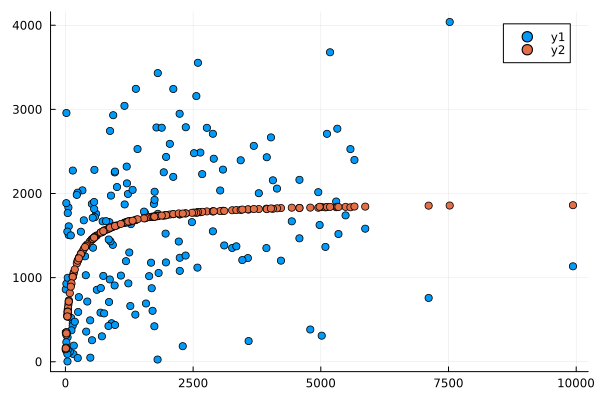

In [17]:
#  Set up single dataframe of observations and predictions. This could be tidier.

dat_predictions_col = fun_growth(dat_b, t, T, W_sim, dat_noise)

dat_predictions = copy(dat_growth_3)

dat_predictions[!, :predictions] = vec(dat_predictions_col)

dat_predictions[!, :Volume_Difference_Predicted] = dat_predictions.predictions - dat_predictions.Volume_First

#  Plot second volume on first volume.

plot(dat_predictions.Volume_First, dat_predictions.Volume_Second, seriestype=:scatter)
plot!(dat_predictions.Volume_First, dat_predictions.predictions, seriestype=:scatter)

#  Plot growth on first volume.

plot(dat_predictions.Volume_First, dat_predictions.Volume_Difference, seriestype=:scatter)
plot!(dat_predictions.Volume_First, dat_predictions.Volume_Difference_Predicted, seriestype=:scatter)

# Notes

So, this notebook starts with FIA DB products and ends with a growth model for a subset of Douglas Fir in western Oregon.

Some next steps:

1. Trying out alternative optimization routines, model diagnostics, and visualizations.
2. Extending this model estimation workflow to functional programming for several models.
3. Correcting any problems that came up in translation from MATLAB.
4. Incorporating disturbance and treatment variables. 
5. Trying out alternative functional forms.